# Problem statement

We have a groceries dataset and we are going to analyze it, to give better recommendation to the customers. This will help stores understand which items are most frequently purchaced and capitalize on that knowledge.

1. They can do this by recommending customers to purchase certain items together. This will help ease the customer purchase decisions.
2. Offer certain discounts on basket of goods. This will ultimately lead them to generate more revenue through sales volume.
3. Increased sales volume means faster moving inventory. This will reduce the inventory holding cost and ultimately leading to more profits.

# Methodology

To solve this problem we will perform the following steps:

1. Import the necessary libraries
2. Import dataset using pandas
3. Perform exploratory analysis
4. Fit the data into apriori Algorithm
5. Analyze and Conclude

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [2]:
#Importing Dataset
df = pd.read_csv('C:/Users/adils/Desktop/MACHINE LEARNING/DATASETS/Market Basket analysis/groceries_data.csv')
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


# Exploratory Analysis

In [3]:
df.shape

(38765, 7)

In [4]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


Looking at the information we see that there are no null or missing values in the dataset.

In [6]:
df['itemDescription'].nunique()

167

We see that there are 167 unique items that the store sells.

In [7]:
df['itemDescription'].value_counts().sort_values(ascending=False).head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

These are the 10 most sold items in the store.

Text(0.5, 1.0, 'Most Sold Items')

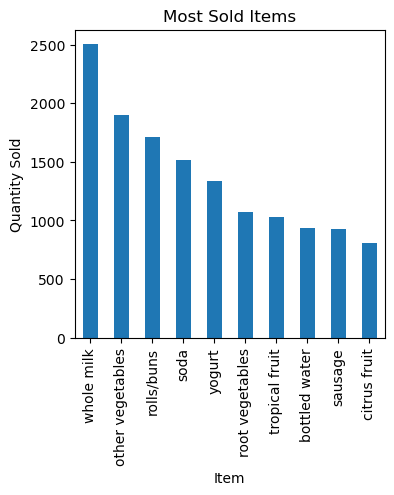

In [8]:
#Plotting the most sold items.

fig, ax = plt.subplots(figsize = (4,4))
df['itemDescription'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.title('Most Sold Items')

Next we are going to find out yearly.

In [9]:
item_counts = df.groupby(['year', 'itemDescription']).size().unstack(fill_value=0)
item_total_counts = item_counts.sum(axis=0)

In [10]:
top_items_2014 = item_counts.loc[2014].sort_values(ascending=False).head(10)
top_items_2015 = item_counts.loc[2015].sort_values(ascending=False).head(10)

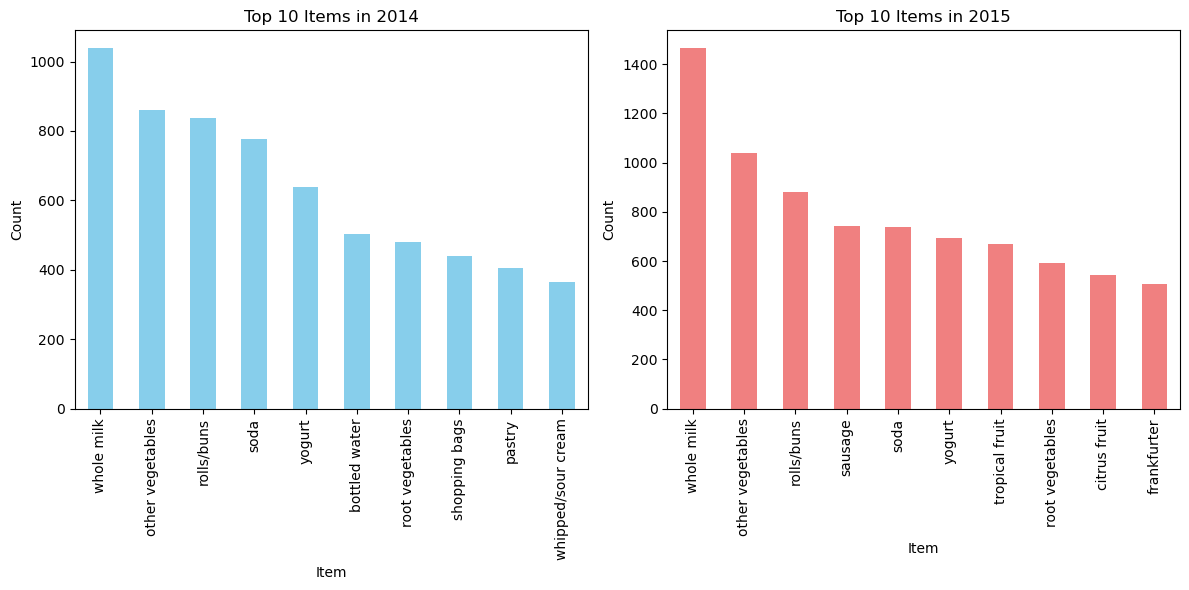

In [11]:
plt.figure(figsize=(12, 6))

# Plot for 2014
plt.subplot(1, 2, 1)
top_items_2014.plot(kind='bar', color='skyblue')
plt.title('Top 10 Items in 2014')
plt.xlabel('Item')
plt.ylabel('Count')

# Plot for 2015
plt.subplot(1, 2, 2)
top_items_2015.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Items in 2015')
plt.xlabel('Item')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
labels_2014 = ['whole milk','other vegetables','rolls/buns','soda','yogurt','bottled water',
                'root vegetables','shopping bags','pastry','whipped/sour cream']
labels_2015 = ['whole milk','other vegetables','rolls/buns','sausage','soda','yogurt',
               'tropical fruit','root vegetables','citrus fruit','frankfurter']

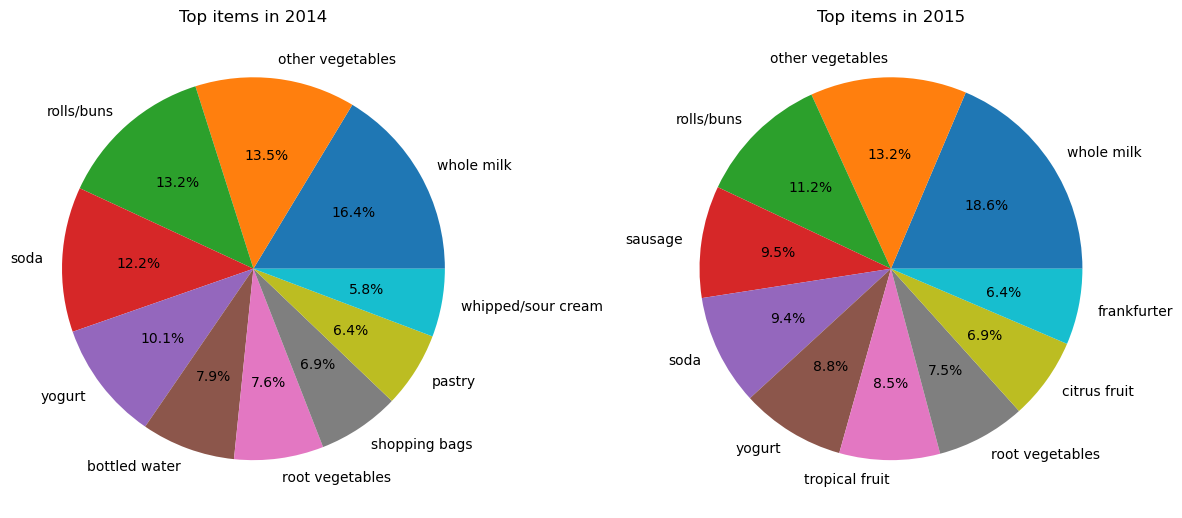

In [13]:
#Creating Pie Chart for both years.

plt.figure(figsize=(12,6))

#For year 2014
plt.subplot(1,2,1)
plt.pie(top_items_2014, labels=labels_2014,autopct='%1.1f%%')
plt.title('Top items in 2014')

#For year 2015
plt.subplot(1,2,2)
plt.pie(top_items_2015,labels=labels_2015,autopct='%1.1f%%')
plt.title('Top items in 2015')

plt.tight_layout()
plt.show()

In [14]:
df['months'] = df['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

In [15]:
#Splitting dataset by year to do monthly analysis

df_2014 = df.get(df['year'] == 2014)
df_2015 = df.get(df['year'] == 2015)

In [16]:
monthly_sales_2014 = df_2014.groupby('months')['itemDescription'].count().reset_index()
monthly_sales_2014 = monthly_sales_2014.set_index('months')
monthly_sales_2015 = df_2015.groupby('months')['itemDescription'].count().reset_index()
monthly_sales_2015 = monthly_sales_2015.set_index('months')
monthly_sales_2014


,itemDescription
months,
April,1506
August,1535
December,1520
February,1547
January,1504
July,1623
June,1525
March,1491
May,1625


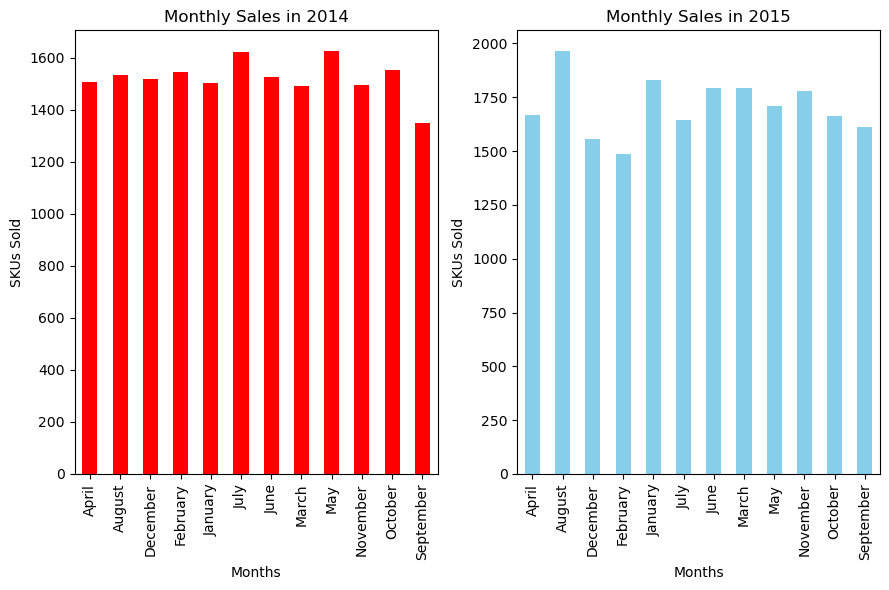

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(9,6))

# Monthly SKUs sold in 2014
monthly_sales_2014.plot(kind='bar', color='red', ax=axes[0])
axes[0].set_title('Monthly Sales in 2014')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('SKUs Sold')
axes[0].legend().set_visible(False)

# Monthly SKUs SOld in 2015
monthly_sales_2015.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Monthly Sales in 2015')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('SKUs Sold')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()

# Association Rule

Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction.

**Trivial:** That provide insight that is already well known by those familiar with the domain.

**Inexplicable:** Rules that defy rational explaination or donot suggest a clear course of action. Requires more research to understand.

**Actionable Rules:** Rules that provide clear and useful insights that can be acted upon. They sometimes are rules that are initially seened inexplicable but can turn out to be actionable after some research.


**Rule Evaluation Metrics**

1. **Support:** Support is the measure of significance of a rule. It is a measure for the frequency of the occurence of the rule. Support is measure of transaction that contain rule.

2. **Confidence:** Confidence is the predictive power or accuracy of the rule.

3. **Lift:** Lift of a rule is the increased likelihood of a rule occuring to its typical rate of occurence. Lift value ranges from [0,∞). If the lift value is more than 1, we would interpret as a multiplier of likelihood

4. **Zhang's Metric:** Zhang's metric quantifies degree of association or dissociation between the antecedent and consequent. It ranges from [-1,1]. Zhang's metric is useful in indentifying items that should or should not be placed next to each other. Even if they have been purchased together previously.

# Apriori Algorithm

**Apriori Principle** states that if an itemset is frequent then all its subset must also be frequent. The converse of apriori also applies. Meaning if an itemset is found to be infrequent then all it's supersets are infrequent aswell.

Apriori algorithm generates itemsets by recursively:
1. Generating new candidate itemsets based on the frequent itemsets from the previous iteration.
2. Pruning the candidate itemsets using support based pruning strategy.

In [18]:
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [19]:
te = TransactionEncoder()
items_transformed = te.fit_transform(items)

item_matrix = pd.DataFrame(items_transformed, columns=te.columns_)
item_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [20]:
freq_items = apriori(item_matrix, min_support = 0.02, use_colnames=True, max_len=4)
freq_items.sort_values(by='support', ascending = False)

,support,itemsets
85,0.458184,(whole milk)
52,0.376603,(other vegetables)
64,0.349666,(rolls/buns)
73,0.313494,(soda)
86,0.282966,(yogurt)
...,...,...
100,0.020010,"(beef, newspapers)"
99,0.020010,"(frankfurter, beef)"
265,0.020010,"(chocolate, root vegetables)"
374,0.020010,"(whipped/sour cream, frozen vegetables)"


In [21]:
rules = association_rules(freq_items, metric = 'support', min_threshold=0.02)
rules.sort_values(by = 'zhangs_metric', ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2779,(whole milk),"(other vegetables, bottled water, yogurt)",0.458184,0.032324,0.022063,0.048152,1.489664,0.007252,1.016629,0.606677
1123,(whole milk),"(bottled beer, shopping bags)",0.458184,0.030272,0.020010,0.043673,1.442690,0.006140,1.014013,0.566336
2890,(whole milk),"(other vegetables, yogurt, rolls/buns)",0.458184,0.052335,0.034377,0.075028,1.433623,0.010398,1.024534,0.558246
1519,(whole milk),"(canned beer, shopping bags)",0.458184,0.033607,0.022063,0.048152,1.432806,0.006664,1.015281,0.557512
2973,(yogurt),"(sausage, whole milk, rolls/buns)",0.282966,0.048743,0.022832,0.080689,1.655399,0.009040,1.034750,0.552158
2933,(whole milk),"(soda, other vegetables, yogurt)",0.458184,0.043099,0.027963,0.061030,1.416047,0.008216,1.019097,0.542266
2947,(whole milk),"(tropical fruit, other vegetables, yogurt)",0.458184,0.032837,0.021293,0.046473,1.415235,0.006247,1.014300,0.541518
2970,"(yogurt, rolls/buns)","(sausage, whole milk)",0.111339,0.106978,0.022832,0.205069,1.916929,0.010921,1.123396,0.538262
2969,"(whole milk, yogurt)","(sausage, rolls/buns)",0.150590,0.082350,0.022832,0.151618,1.841148,0.010431,1.081648,0.537856
2967,"(sausage, whole milk)","(yogurt, rolls/buns)",0.106978,0.111339,0.022832,0.213429,1.916929,0.010921,1.129791,0.535633


In [24]:
rules.sort_values(by = 'lift', ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2967,"(sausage, whole milk)","(yogurt, rolls/buns)",0.106978,0.111339,0.022832,0.213429,1.916929,0.010921,1.129791,0.535633
2970,"(yogurt, rolls/buns)","(sausage, whole milk)",0.111339,0.106978,0.022832,0.205069,1.916929,0.010921,1.123396,0.538262
2969,"(whole milk, yogurt)","(sausage, rolls/buns)",0.150590,0.082350,0.022832,0.151618,1.841148,0.010431,1.081648,0.537856
2968,"(sausage, rolls/buns)","(whole milk, yogurt)",0.082350,0.150590,0.022832,0.277259,1.841148,0.010431,1.175261,0.497859
2912,"(sausage, whole milk)","(other vegetables, yogurt)",0.106978,0.120318,0.023089,0.215827,1.793806,0.010217,1.121796,0.495538
2913,"(other vegetables, yogurt)","(sausage, whole milk)",0.120318,0.106978,0.023089,0.191898,1.793806,0.010217,1.105085,0.503052
2773,"(bottled water, yogurt)","(other vegetables, whole milk)",0.066444,0.191380,0.022063,0.332046,1.735009,0.009346,1.210593,0.453786
2772,"(other vegetables, whole milk)","(bottled water, yogurt)",0.191380,0.066444,0.022063,0.115282,1.735009,0.009346,1.055201,0.523898
2971,"(whole milk, rolls/buns)","(sausage, yogurt)",0.178553,0.075423,0.022832,0.127874,1.695412,0.009365,1.060141,0.499330
2966,"(sausage, yogurt)","(whole milk, rolls/buns)",0.075423,0.178553,0.022832,0.302721,1.695412,0.009365,1.178075,0.443633


# Conclusion
Zhang's Metrics tells us association and dissociation between antecedents and consequents. It ranges from [-1,1]. Negative values indicate dissociation and positive values indicate association.

We sorted the associations based on zhangs_metric. From the first 4 rows we saw that 'whole milk' has strong association with vegetables, yogurt, rolls/buns and bottled water.
I think it is safe to assume that people who are buying vegetables often buy dairy products together and vice-versa.

Also, from lift value we see that people who are buying vegetables and yogurt, are 1.8 times more likely to buy sausages and whole milk. The reason for this could be that sausages are stored in cold storages near the dairy products. Hence, these items are more likely to be purchased together.


Some of the antecedent and consequent are inexplicable in nature and they would need further analysis by the business to convert them into actionable rules.

# Business Strategy
In a retail supermarket, an effective store layout based on the above analysis involves strategically placing sections such as vegetables and dairy products at a distance from each other. This intentional separation compels customers to travel through the store while seeking to purchase both categories. Consequently, this extended shopping journey heightens the probability that the customer will pick up additional products along the way.


For an e-commerce platform this means we should recommend dairy products to customers who are buying vegetables during the checkout and vice-versa. This can lead to customers adding more products to their basket before purchasing. Leading to an increase in sales.